<a href="https://colab.research.google.com/github/Abbta/adlfpae/blob/main/Exercise_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6.3: Neural Networks in Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# See https://keras.io/
# for extennsive documentation
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [9]:
#For verifying GPU is used when run locally
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:1d:00.0, compute capability: 6.1



Let us visit the problem of wine quality prediction previously encountered one final time. After linear regression and a self-made network, we can now explore the comfort provided by the Keras library.

In [ ]:
# The code snippet below is responsible for downloading the dataset to
# Google. You can directly download the file using the link
# if you work with a local anaconda setup
import os
if not os.path.exists("winequality-white.csv"):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv --no-check-certificate

In [2]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.seed(1234) # set seed to get reproducable results
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])


data: (4898, 12)
First example:
Features: [6.100e+00 2.200e-01 4.900e-01 1.500e+00 5.100e-02 1.800e+01 8.700e+01
 9.928e-01 3.300e+00 4.600e-01 9.600e+00]
Quality: 5.0


Below is the simple network from exercise 4.1 implemented using Keras. In addition to the network we define the loss function and optimiser.

In [18]:
# See: https://keras.io/api/models/sequential/ and
# https://keras.io/api/layers/core_layers/dense/
# We can use the Sequential class to very easiliy
# build a simple architecture
model = Sequential()
# 11 inputs, 20 outputs, relu
model.add(Dense(250, input_dim=11, activation='relu'))
# 20 inputs (automatically detected by Keras), 1 output, linear activation
model.add(Dense(27, input_dim=11, activation='relu'))
model.add(Dense(1, activation='linear'))


# Set loss function and optimiser algorithm
model.compile(loss='mse',  # mean squared error
              optimizer='adam'# stochastic gradient descent
             )

# Training and evaluation below

The code below trains the network for 5 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

In [20]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=5)


Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6336 - val_loss: 0.6171
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6496 - val_loss: 0.9222
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6757 - val_loss: 0.5873
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6698 - val_loss: 0.5771
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6576 - val_loss: 0.5698


## Note
This is the best I can accomplish by **only changing network architecture**, i.e. not changing the training process. In this case I found reguralization did not help performance.

In [21]:
# The history object returned by the model training above
# contains the values of the loss function (the mean-squared-error)
# at different epochs
# We discard the first epoch as the loss value is very high,
# obscuring the rest of the distribution
train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

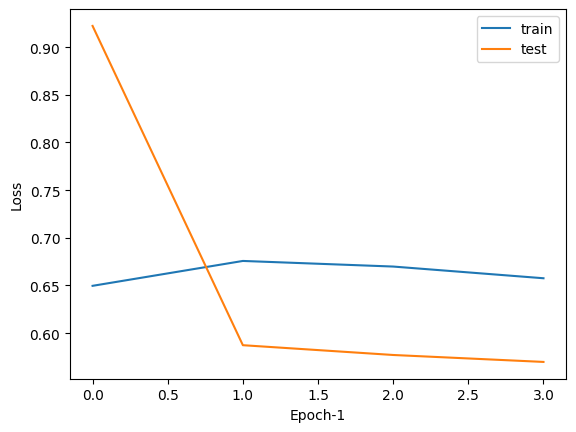

In [22]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epoch-1")
plt.ylabel("Loss")
plt.show()

60/60 [==============================] - 0s 1ms/step
Correlation coefficient: 0.5414947614395764


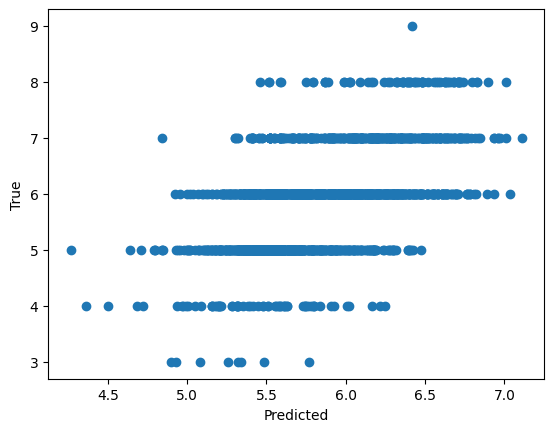

In [23]:
# After the training:

# Prepare scatter plot
y_pred = model.predict(X_test)[:,0]

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
np.corrcoef(y_pred,y_test)

array([[1.        , 0.54149476],
       [0.54149476, 1.        ]])

## Note
I think this is an acceptable result. Still only just slightly better than linear regression (corrcoef 0.52).


# Problems

* Use the notebook as starting point. It already contains the simple network from Exercise 4.1 implemented in Keras.

* Currently, SGD is used without momentum. Try training with a momentum term. Replace SGD with the Adam optimizer and train using that. (See: https://keras.io/api/optimizers/)
* Add two more hidden layers to the network (you can choose the number of nodes but make sure to apply the ReLu activation function after each) and train again.
* Test differet numbers of examples (i.e. change the batch batch size) to be simulataneously used by the network.
* (bonus) optimize the network architecture to get the best correlation coefficient. (Let's see who gets the most out of the data).

**Dont mind this:**

In [15]:
N=500
res2={}
for i in range(N):
    print(i)
    depth=np.random.randint(1, 10)
    width=[]
    dropout=[]
    for j in range(depth):
        width.append(np.random.randint(1,256))
        dropout.append(0.1*np.random.randint(0,7))
    model = Sequential()
    
    model.add(Dense(width[0], input_dim=11, activation='relu'))
    model.add(keras.layers.Dropout(dropout[0]))
    
    for j in range(1,depth):
        model.add(Dense(width[j], activation='relu'))
        model.add(keras.layers.Dropout(dropout[j]))
    
    model.add(Dense(1, activation='linear'))


    # Set loss function and optimiser algorithm
    model.compile(loss='mse',  # mean squared error
                optimizer='adam', metrics=['accuracy']# stochastic gradient descent
                )
    model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=60, verbose=0)
    
    loss=model.evaluate(X_test, y_test, verbose=0, batch_size=5, return_dict=False)[0]
    res2[f"{depth}, {width}, {dropout}"]=loss
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
print(res)
print(min(res.values()))

{'9, [19, 136, 48, 82, 75, 93, 198, 167, 74], [0.4, 0.1, 0.4, 0.1, 0.5, 0.30000000000000004, 0.1, 0.2, 0.2]': 7.534972190856934, '1, [133], [0.0]': 0.6891700029373169, '3, [218, 252, 136], [0.30000000000000004, 0.30000000000000004, 0.0]': 6.034780502319336, '9, [255, 10, 203, 176, 97, 223, 89, 84, 27], [0.4, 0.4, 0.5, 0.30000000000000004, 0.4, 0.0, 0.5, 0.2, 0.1]': 18.33155059814453, '8, [39, 62, 151, 187, 145, 209, 219, 65], [0.2, 0.30000000000000004, 0.5, 0.4, 0.5, 0.2, 0.1, 0.0]': 19.48366928100586, '1, [116], [0.0]': 0.6674709320068359, '8, [166, 69, 177, 59, 106, 157, 51, 115], [0.6000000000000001, 0.0, 0.6000000000000001, 0.1, 0.6000000000000001, 0.6000000000000001, 0.30000000000000004, 0.2]': 15.5562162399292, '9, [86, 215, 15, 118, 110, 109, 123, 125, 45], [0.30000000000000004, 0.2, 0.4, 0.0, 0.30000000000000004, 0.4, 0.30000000000000004, 0.4, 0.1]': 12.392274856567383, '3, [43, 236, 250], [0.5, 0.1, 0.1]': 9.150728225708008, '9, [124, 167, 142, 12, 117, 46, 193, 59, 107], [0.4

In [17]:
print(min(res2.values()))
print(list(res2.keys())[list(res2.values()).index(min(res2.values()))])

0.6188573837280273
2, [255, 27], [0.0, 0.0]
